# EDA

## Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sweetviz as sv
from sklearn.model_selection import train_test_split

## Data Load and Split

In [ ]:
x_df = pd.read_csv('..\\data\\features.csv')
y_df = pd.read_csv('..\\data\\labels.csv')

display(x_df.head())
display(y_df.head())

,username,link_karma,comment_karma,account_age,is_verified,avg_cosine_similarity,all_users_similarity,avg_comment_length,max_comment_length,min_comment_length,comment_post_ratio,avg_thread_depth,parent_child_similarity,avg_ttr,avg_flesch_kincaid_grade,ngram_overlap
0,yakfsh1,19830.0,88232.0,1440.0,True,1.0,1.0,382.0,382.0,382.0,1.0,0.500000,0.0,0.931034,12.1,0.0
1,Tsquare43,699100.0,720902.0,3636.0,True,1.0,1.0,62.0,62.0,62.0,1.0,0.666667,0.0,0.927318,6.9,0.0
2,SeaSpeakToMe,236.0,11628.0,1029.0,True,NaN,1.0,75.0,81.0,67.0,1.0,1.000000,0.0,1.000000,1.3,0.0
3,hurtingxliving,848.0,1275.0,2001.0,True,NaN,1.0,39.0,39.0,39.0,1.0,0.000000,0.0,0.888889,12.6,0.0
4,Minute-Photo6916,1.0,4.0,12.0,True,NaN,1.0,15.0,15.0,15.0,1.0,1.000000,0.0,1.000000,-2.3,0.0


,username,is_bot
0,yakfsh1,False
1,Tsquare43,False
2,SeaSpeakToMe,False
3,hurtingxliving,False
4,Minute-Photo6916,False


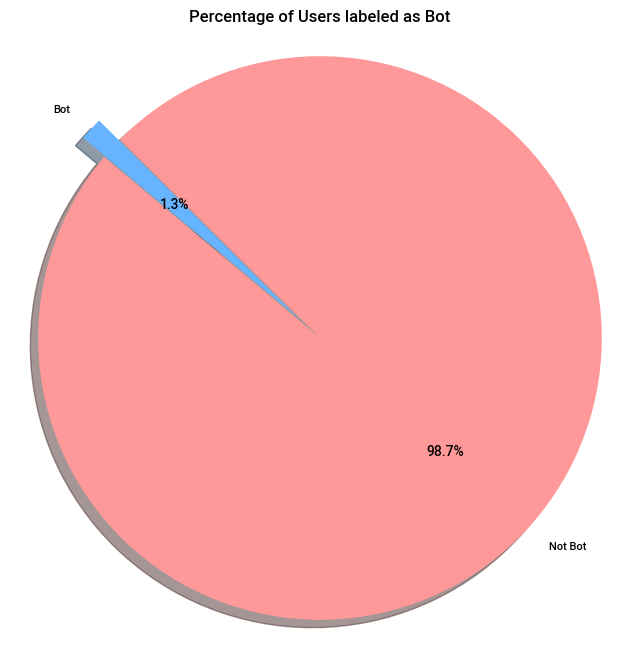

In [13]:
bot_counts = y_df['is_bot'].value_counts()

labels = ['Not Bot', 'Bot']
sizes = [bot_counts[False], bot_counts[True]]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Users labeled as Bot')
plt.show()


In [14]:
def create_balanced_dataset(y_df, x_df, bot_ratio=0.4):
    merged_df = pd.merge(y_df, x_df, on='username')
    bot_users = merged_df[merged_df['is_bot'] == True]

    num_bots = len(bot_users)
    num_non_bots = int((num_bots / bot_ratio) - num_bots)
    non_bot_users = merged_df[merged_df['is_bot'] == False].sample(n=num_non_bots, random_state=42)
    balanced_df = pd.concat([bot_users, non_bot_users])

    new_y_df = balanced_df[['username', 'is_bot']]
    new_x_df = balanced_df.drop(columns=['is_bot'])
    
    return new_x_df, new_y_df

In [15]:
X_df_balanced, y_df_balanced = create_balanced_dataset(y_df, x_df)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_df_balanced, y_df_balanced, test_size=0.2, random_state=42, stratify=y_df_balanced['is_bot'])

## Auto EDA

In [17]:
df_train = X_train.merge(y_train, on='username', how="left")

In [18]:
sweet_report = sv.analyze(df_train, target_feat='is_bot')
sweet_report.show_html('data\\EDA_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)


Report data\EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Conclusions**

Columns:
- username - to remove for a training
- link_karma - to standardisation, None to remove
- comment_karma - to standardisation, None to remove
- account_age - to standardisation, None to remove
- is_verified - to standardisation, None to remove
- avg_cosine_similarity - None replace with 0
- all_users_similarity - None replace with 0
- avg_comment_length - to standardisation, None replace with 0 before std
- max_comment_length - to standardisation, None replace with 0 before std
- min_comment_length - to standardisation, None replace with 0 before std
- comment_post_ratio - to standardisation, None replace with 1 after std
- avg_thread_depth - None replace with 0 (to repair)
- parent_child_similarity - to remove and repair
- avg_ttr - None replace with 0
- avg_flesch_kincaid_grade - to standardisation, None replace with 0 before std
- ngram_overlap - None replace with 0
- is_bot - change to 0, 1

ToDo: Repair avg_thread_depth and parent_child_similarity
